In [4]:
import numpy as np
import matplotlib.pyplot as plt, matplotlib as mpl
import random

import mplhep as hep

hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

In [8]:
styles=[dict(color='k', linestyle='-'), dict(color='r', linestyle='--'), dict(color='b', linestyle=':'),
       dict(color='g', linestyle='-.')]

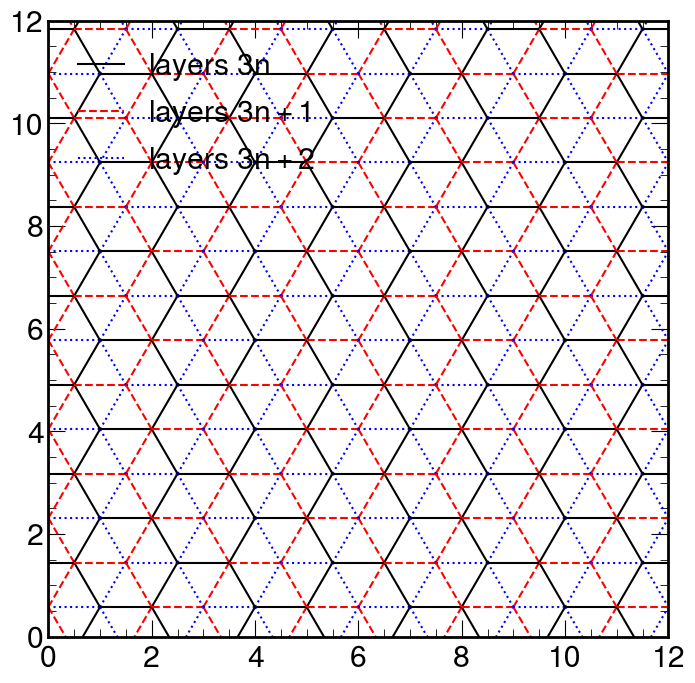

In [19]:

fig=plt.subplots(figsize=(8,8))


def draw_hexagons(staggered=True,
                 x0s=(-1/2, 1/2, 0),
                 y0s=(-np.sqrt(3)/6, -np.sqrt(3)/6, np.sqrt(3)/3)):
    s=1
    
    
    
    if not staggered:
        x0s=[0]#np.array(x0s)*0.05
        y0s=[0]#np.array(y0s)*0.05
    
    for i in range(-2,5):
        for j in range(-2,16):
            for style, x0, y0 in zip(styles, x0s, y0s):
                plt.plot((x0+s*(3*i+(j%2)*3/2), x0+s*(3*i+1+(j%2)*3/2)), 
                         (y0+s*np.sqrt(3)/2*j, y0+s*np.sqrt(3)/2*j), **style)
                plt.plot((x0+s*(3*i+1+(j%2)*3/2), x0+s*(3*i+3/2+(j%2)*3/2)), 
                         (y0+s*np.sqrt(3)/2*j, y0+s*np.sqrt(3)/2*(j+1)), **style)
                plt.plot((x0+s*(3*i+1+(j%2)*3/2), x0+s*(3*i+3/2+(j%2)*3/2)), 
                         (y0+s*np.sqrt(3)/2*j, y0+s*np.sqrt(3)/2*(j-1)), **style)


draw_hexagons(True)

#now make legend
labels=["layers $3n$", "layers $3n+1$", "layers $3n+2$"]
handles=[]
for i in range(3):
    handles.append(plt.plot([],[], **styles[i],label=labels[i])[0])
plt.legend(handles=handles, loc='upper left', framealpha=1)

plt.xlim(0,12)
plt.ylim(0,12)
plt.show()

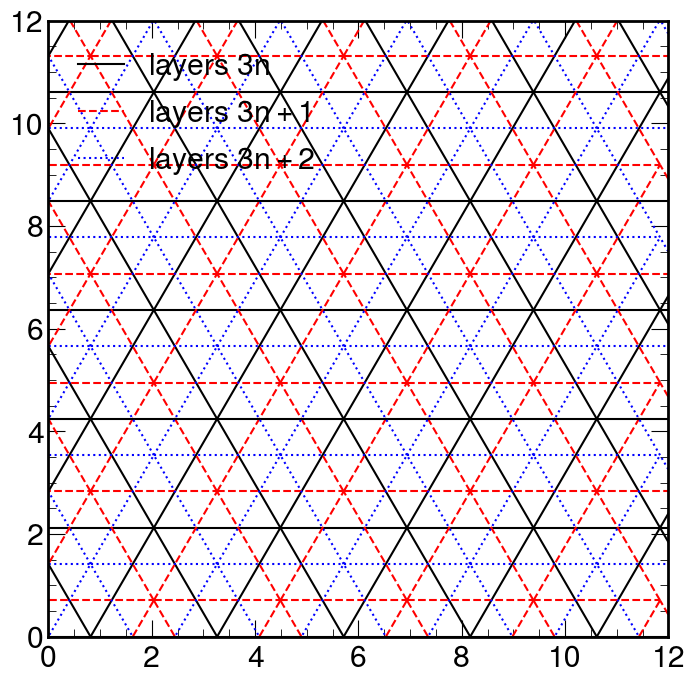

In [20]:

fig=plt.subplots(figsize=(8,8))

#styles=[dict(color='k', linestyle='-'), dict(color='r', linestyle='--'), dict(color='b', linestyle=':')]

def draw_triangles(staggered=True):
    s=np.sqrt(6)
    x0s=np.array((1/3, -1/6, -1/6))*s
    y0s=np.array((0, np.sqrt(3)/6, -np.sqrt(3)/6))*s
    if not staggered:
        x0s=[0]#np.array(x0s)*.05
        y0s=[0]#np.array(y0s)*.05
    
    for i in range(-2,5):
        for j in range(-2,16):
            for style, x0, y0 in zip(styles, x0s, y0s):
                plt.plot((x0+s*(i+(j%2)/2), x0+s*(i+1+(j%2)/2)), 
                         (y0+s*np.sqrt(3)/2*j, y0+s*np.sqrt(3)/2*j), **style)
                plt.plot((x0+s*(i+(j%2)/2),x0+s*(i+1/2+(j%2)/2)),
                         (y0+s*np.sqrt(3)/2*j,y0+s*np.sqrt(3)/2*(j+1)), **style)
                plt.plot((x0+s*(i+1+(j%2)/2),x0+s*(i+1/2+(j%2)/2)),
                         (y0+s*np.sqrt(3)/2*j,y0+s*np.sqrt(3)/2*(j+1)), **style)
                #plt.plot((x0+s*(3*i+1+(j%2)*3/2), x0+s*(3*i+3/2+(j%2)*3/2)), 
                         #(y0+s*np.sqrt(3)/2*j, y0+s*np.sqrt(3)/2*(j+1)), **style)
                #plt.plot((x0+s*(3*i+1+(j%2)*3/2), x0+s*(3*i+3/2+(j%2)*3/2)), 
                         #(y0+s*np.sqrt(3)/2*j, y0+s*np.sqrt(3)/2*(j-1)), **style)


draw_triangles(True)

#now make legend
labels=["layers $3n$", "layers $3n+1$", "layers $3n+2$"]
handles=[]
for i in range(3):
    handles.append(plt.plot([],[], **styles[i],label=labels[i])[0])
plt.legend(handles=handles, loc='upper left', framealpha=1)

plt.xlim(0,12)
plt.ylim(0,12)
plt.show()

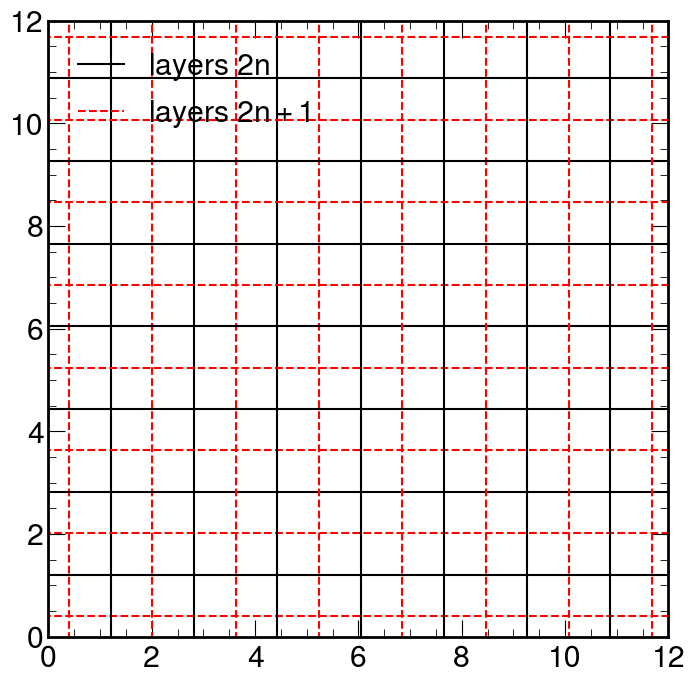

In [21]:

fig=plt.subplots(figsize=(8,8))

#styles=[dict(color='k', linestyle='-'), dict(color='r', linestyle='--'), dict(color='b', linestyle=':')]

def draw_squares(staggered=True, x0s=np.array((-1/4, 1/4)),
                y0s=np.array((-1/4, 1/4))):
    s=np.sqrt(np.sqrt(3)*3/2)
    #x0s=np.array((-1/4, 1/4))*s
    #y0s=np.array((-1/4, 1/4))*s
    if not staggered:
        x0s=[0]#np.array(x0s)*.05
        y0s=[0]#np.array(y0s)*.05
    
    gridsize=10
    for i in range(gridsize+1):
        for style, x0, y0 in zip(styles, x0s, y0s):
            plt.plot((x0*s-s, x0*s+s*gridsize), (y0*s+s*i, y0*s+s*i), **style)
            plt.plot((x0*s+i*s, x0*s+i*s), (y0*s-s, y0*s+s*gridsize), **style)


draw_squares(True)

#now make legend
labels=["layers $2n$", "layers $2n+1$"]
handles=[]
for i in range(2):
    handles.append(plt.plot([],[], **styles[i],label=labels[i])[0])
plt.legend(handles=handles, loc='upper left', framealpha=1)

plt.xlim(0,12)
plt.ylim(0,12)
plt.show()

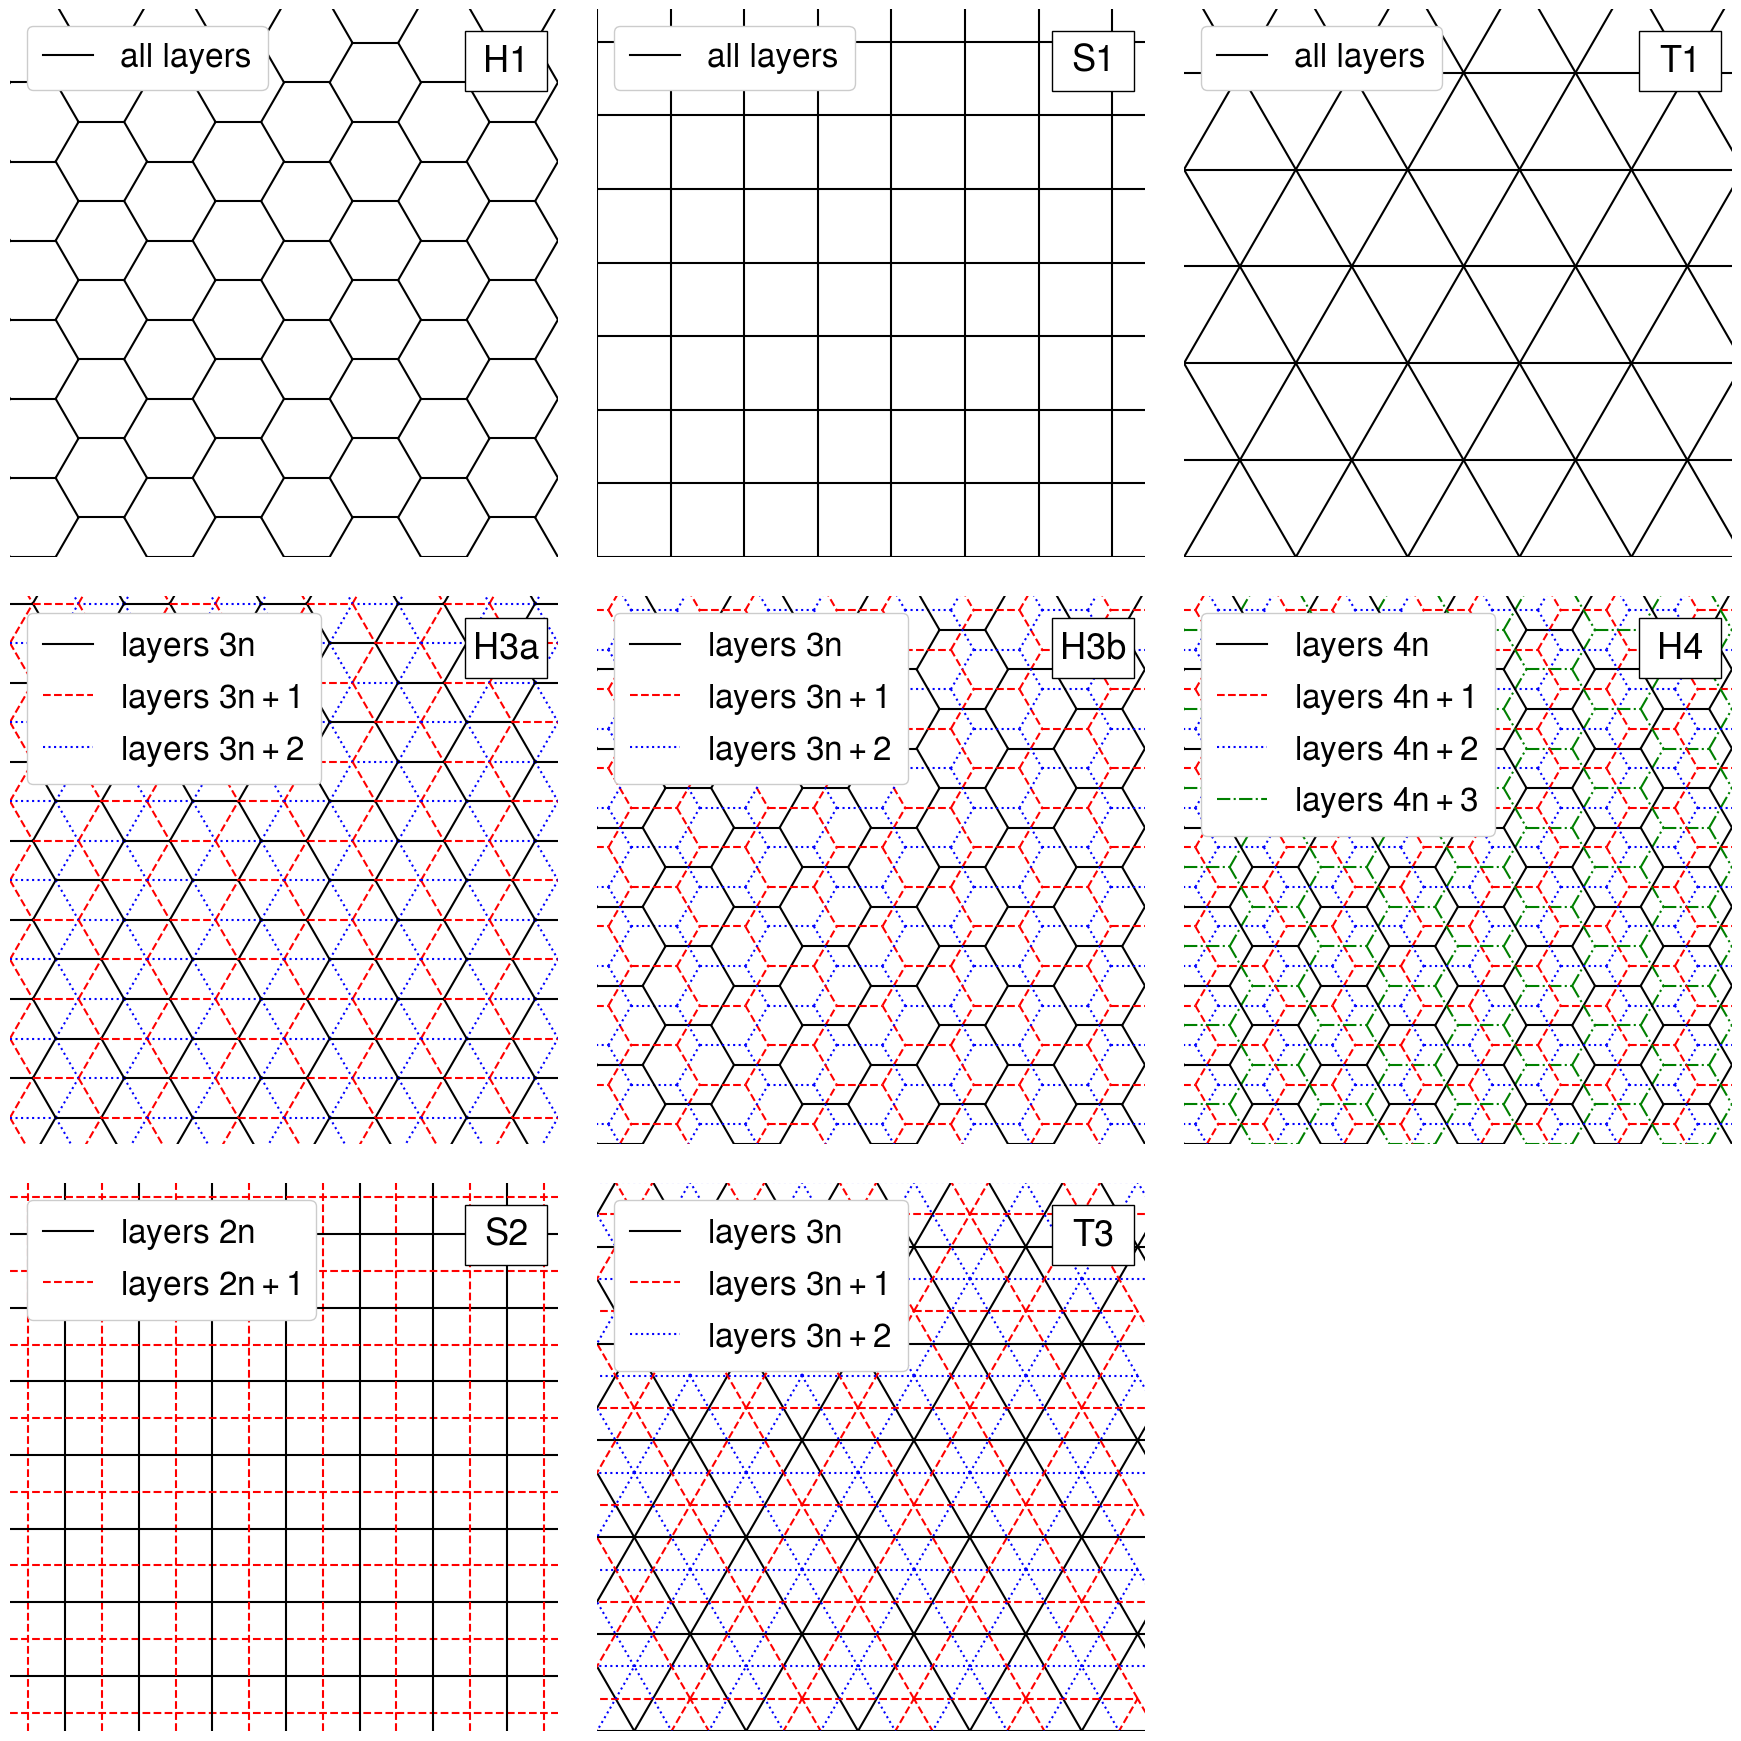

In [22]:
fig, axs = plt.subplots(3, 3, figsize=(18, 18),sharex=True, sharey=True)

draw_funcs=(draw_hexagons,draw_squares, draw_triangles,
            draw_hexagons, draw_hexagons, draw_hexagons,
            draw_squares, draw_triangles)
stagger=(False, False, False, True, True, True, True, True)
add_args=({}, {}, {}, 
          dict(x0s=(-1/2, 1/2, 0),y0s=(-np.sqrt(3)/6, -np.sqrt(3)/6, np.sqrt(3)/3)), 
         dict(x0s=(0, 3/4, -3/4),y0s=(0, np.sqrt(3)/4,np.sqrt(3)/4)),
         dict(x0s=(0, 3/4, -3/4,0),y0s=(0, np.sqrt(3)/4,np.sqrt(3)/4, np.sqrt(3)/2)),
         {},{})
nlayergroups=(1, 1, 1, 3, 3,4, 2, 3)

names="H1 S1 T1 H3a H3b H4 S2 T3".split()

for i in range(8):
    plt.sca(axs[i//3][i%3])
    draw_funcs[i](stagger[i], **(add_args[i]))
    plt.axis("off")
    if nlayergroups[i]!=1:
        labels=[f"layers ${nlayergroups[i]}n$"] + [f"layers ${nlayergroups[i]}n+{j}$" for j in range(1,nlayergroups[i])]
    else :
        labels=["all layers"]
    handles=[]
    for k in range(nlayergroups[i]):
        handles.append(plt.plot([],[], **styles[k],label=labels[k])[0])
   
    plt.legend(framealpha=1, loc='upper left', frameon=True, fontsize=24)#, title=names[i])
    import matplotlib as mpl
    a=0.83,0.85
    w,h=0.15, 0.11
    plt.gca().add_patch(mpl.patches.Rectangle(a, w,h, transform=plt.gca().transAxes, facecolor='w', 
                                             zorder=3, edgecolor='k'))
    plt.text(a[0]+w/2, a[1]+h/2, names[i], transform=plt.gca().transAxes, ha='center', va='center')
    
plt.xlim(0,12)
plt.ylim(0,12)
axs[2][2].axis("off")
plt.tight_layout()
plt.savefig("tesselations.pdf")
plt.show()

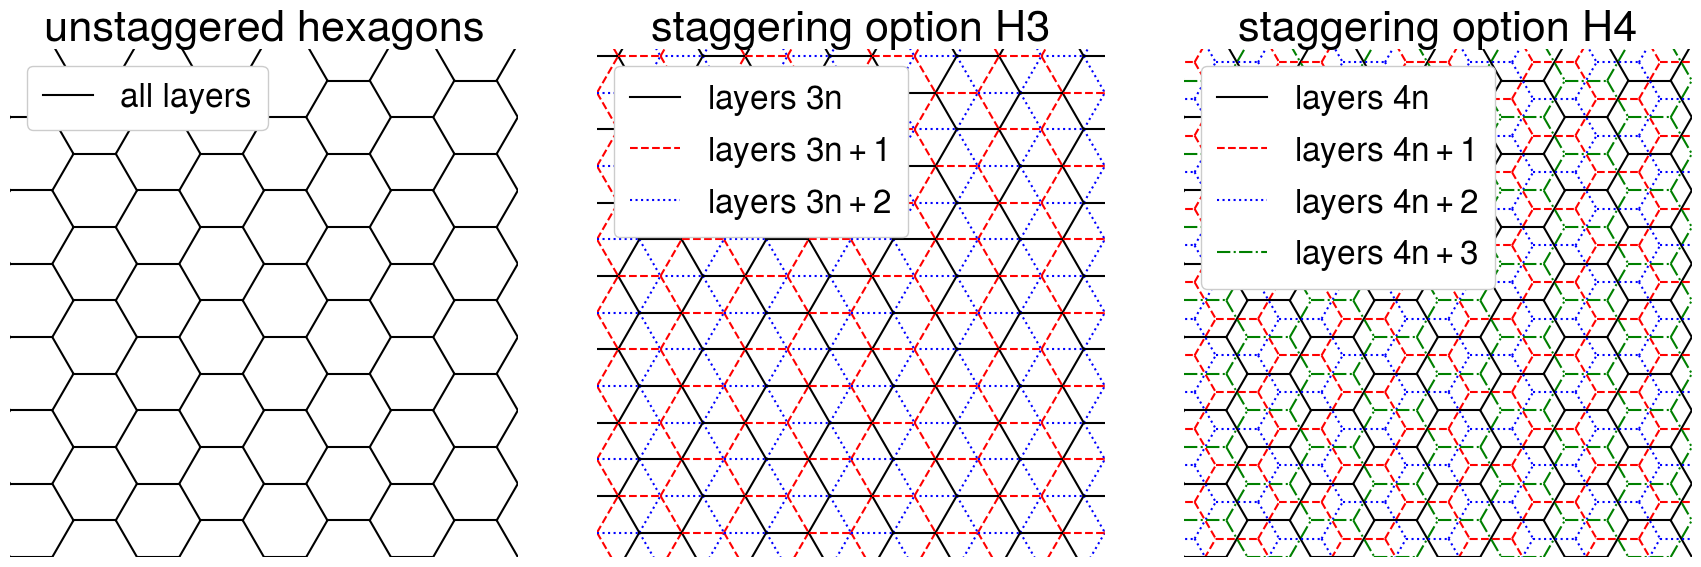

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6),sharex=True, sharey=True)

draw_funcs=[draw_hexagons]*3
stagger=(False, True, True)
add_args=({},  
          dict(x0s=(-1/2, 1/2, 0),y0s=(-np.sqrt(3)/6, -np.sqrt(3)/6, np.sqrt(3)/3)), 
         dict(x0s=(0, 3/4, -3/4,0),y0s=(0, np.sqrt(3)/4,np.sqrt(3)/4, np.sqrt(3)/2)))
nlayergroups=(1, 3, 4)

names="unstaggered hexagons","staggering option H3","staggering option H4"

for i in range(3):
    plt.sca(axs[i])
    draw_funcs[i](stagger[i], **(add_args[i]))
    plt.axis("off")
    if nlayergroups[i]!=1:
        labels=[f"layers ${nlayergroups[i]}n$"] + [f"layers ${nlayergroups[i]}n+{j}$" for j in range(1,nlayergroups[i])]
    else :
        labels=["all layers"]
    handles=[]
    for k in range(nlayergroups[i]):
        handles.append(plt.plot([],[], **styles[k],label=labels[k])[0])
   
    plt.legend(framealpha=1, loc='upper left', frameon=True, fontsize=24)#, title=names[i])
    plt.gca().set_aspect(1)
    #import matplotlib as mpl
    #a=0.83,0.85
    #w,h=0.15, 0.11
    #plt.gca().add_patch(mpl.patches.Rectangle(a, w,h, transform=plt.gca().transAxes, facecolor='w', 
    #                                         zorder=3, edgecolor='k'))
    plt.title(names[i])
    
plt.xlim(0,12)
plt.ylim(0,12)
plt.tight_layout()
plt.savefig("images/tesselations_hex_only.pdf")
plt.show()

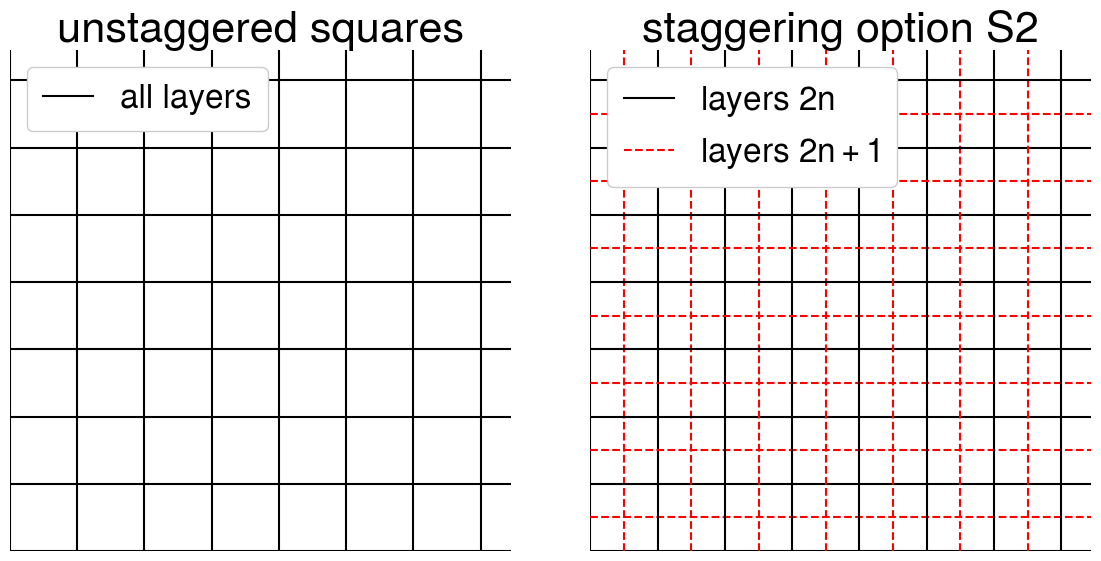

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(18*2/3, 6),sharex=True, sharey=True)

draw_funcs=[draw_squares]*3
stagger=(False, True, True)
add_args=({},  
#          dict(x0s=(0, 0.5),y0s=(0, 0)), 
         dict(x0s=(0, 0.5),y0s=(0, 0.5)))
nlayergroups=(1, 2, 2)

#names="unstaggered squares","semi-staggered squares","staggering option S2"
names="unstaggered squares","staggering option S2"

for i in range(2):
    plt.sca(axs[i])
    draw_funcs[i](stagger[i], **(add_args[i]))
    plt.axis("off")
    if nlayergroups[i]!=1:
        labels=[f"layers ${nlayergroups[i]}n$"] + [f"layers ${nlayergroups[i]}n+{j}$" for j in range(1,nlayergroups[i])]
    else :
        labels=["all layers"]
    handles=[]
    for k in range(nlayergroups[i]):
        handles.append(plt.plot([],[], **styles[k],label=labels[k])[0])
   
    plt.legend(framealpha=1, loc='upper left', frameon=True, fontsize=24)#, title=names[i])
    plt.gca().set_aspect(1)
    #import matplotlib as mpl
    #a=0.83,0.85
    #w,h=0.15, 0.11
    #plt.gca().add_patch(mpl.patches.Rectangle(a, w,h, transform=plt.gca().transAxes, facecolor='w', 
    #                                         zorder=3, edgecolor='k'))
    plt.title(names[i])
    
plt.xlim(0,12)
plt.ylim(0,12)
plt.tight_layout()
plt.savefig("images/tesselations_square_only.pdf")
plt.show()

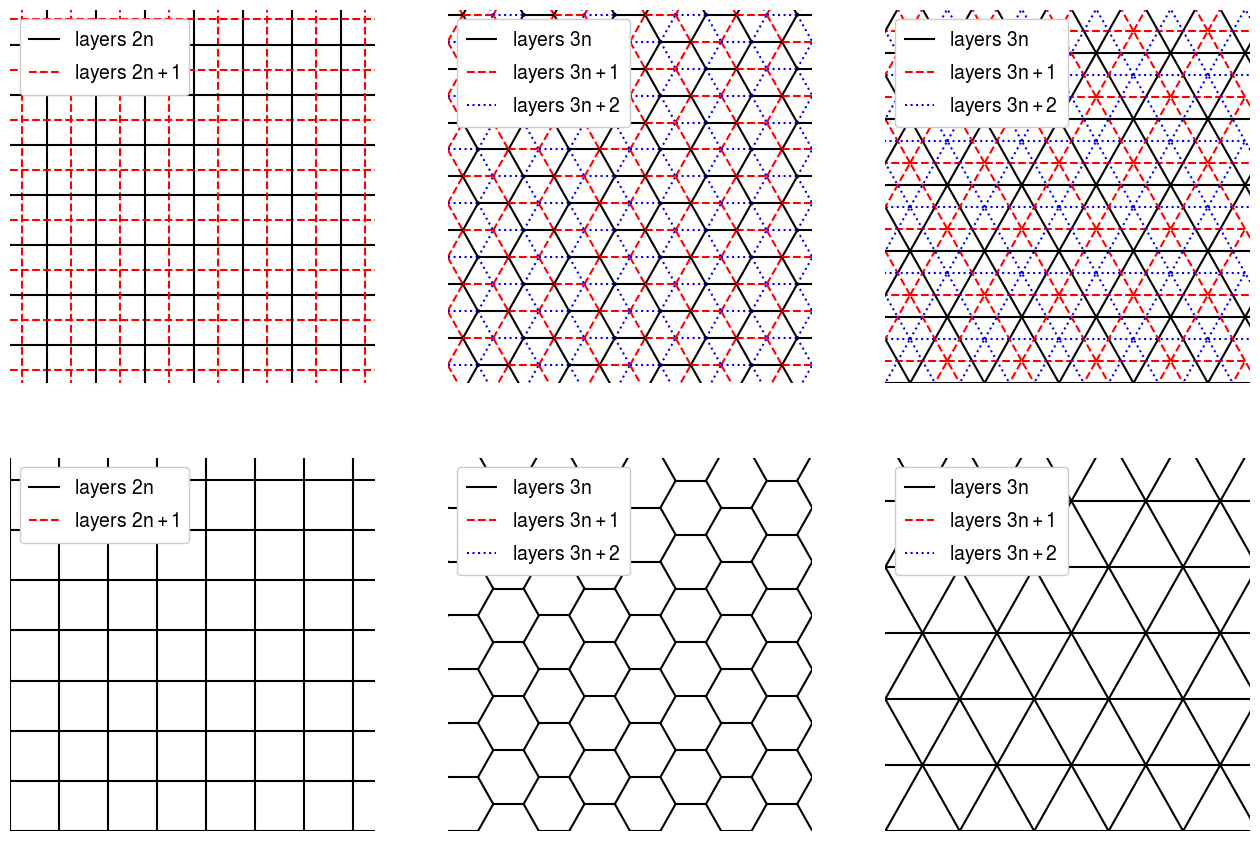

In [25]:
fig, axs = plt.subplots(2, 3, figsize=(16, 16*2/3),sharex=True, sharey=True)

for i,stagger in enumerate((True, False)):
    for j, draw_stuff in enumerate((draw_squares, draw_hexagons, draw_triangles)):
        plt.sca(axs[i][j])
        draw_stuff(stagger)
        plt.axis("off")
        if j==0:
            labels=["layers $2n$", "layers $2n+1$"]
            handles=[]
            for k in range(2):
                handles.append(plt.plot([],[], **styles[k],label=labels[k])[0])
        else:
            labels=["layers $3n$", "layers $3n+1$", "layers $3n+2$"]
            handles=[]
            for k in range(3):
                handles.append(plt.plot([],[], **styles[k],label=labels[k])[0])
        plt.legend(framealpha=1, loc='upper left', frameon=True, fontsize=14)
plt.xlim(0,12)
plt.ylim(0,12)
plt.show()

In [26]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Place a legend on the Axes.
    
    Call signatures::
    
        legend()
        legend(handles, labels)
        legend(handles=handles)
        legend(labels)
    
    The call signatures correspond to the following different ways to use
    this method:
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    sele

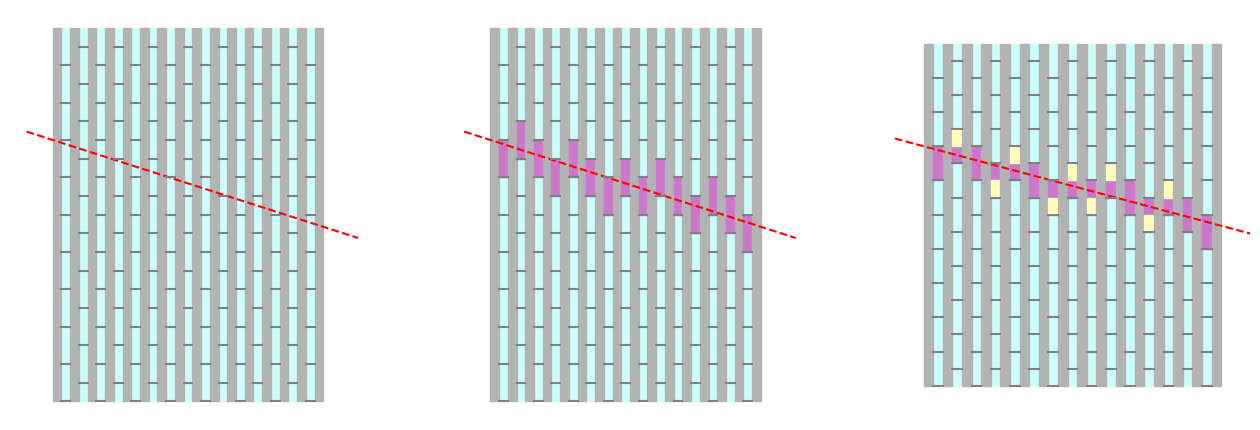

In [27]:
fig, axs = plt.subplots(1,3, figsize=(16, 16/3))

layers=15
h=10
dx=2
for iax in range(3):
    plt.sca(axs[iax])
    
    b=2; m=-3/40
    x=np.array((-3,5+dx*layers))
    plt.plot(x, m*x+b, linestyle='--', color='r')
    plt.gca().add_patch(mpl.patches.Rectangle((0, -h/2), layers*dx, h, color='#ccffff', zorder=-2))
    def isHit(i, j):
        #make sure i and j are integers
        i=i-(i%1)
        j=j-(j%1)
        y=j+(i%2)/2-(h//2)
        x=dx*i+1.5
        return m*x+b>y and m*x+b<y+1
    hits_x=[]
    hits_y=[]
    hits_dy=[]
    for i in range(layers+1):
        
        x=dx*i
        plt.gca().add_patch(mpl.patches.Rectangle((x, -h/2), 1, h, color='0.7'))
        if i <layers:
            for j in range(0, h):
                y=j+(i%2)/2-(h//2)
                plt.plot((x+1, x+2), (y,y), color='0.5')
                #color the cells that were hit
                if iax in (1,2) and isHit(i,j):
                    plt.gca().add_patch(mpl.patches.Rectangle((x+1, y), 1, 1, 
                                                              color= '#cc77cc'))
                    # apply the post-processing to filter out parts of a cell that were probably not hit
                    if iax == 2 and i>0 and i<layers-1 and i%2==1 and not isHit(i-1,j) and not isHit(i+1,j):
                        #print(i,j,1)
                        plt.gca().add_patch(mpl.patches.Rectangle((x+1, y), 1, 0.5, color='#ffffbb'))
                        hits_x.append(x+1.5)
                        hits_y.append(y+.75)
                        hits_dy.append(.5/np.sqrt(12))
                    elif iax == 2 and i>0 and i<layers-1 and i%2==0 and (not isHit(i-1,j-1)) and (not isHit(i+1,j-1)):
                        #print(i,j,i-1, j-1, i+1, j-1)
                        #print(isHit(i+1,j))
                        hits_x.append(x+1.5)
                        hits_y.append(y+.75)
                        hits_dy.append(.5/np.sqrt(12))
                        plt.gca().add_patch(mpl.patches.Rectangle((x+1, y), 1, 0.5, color='#ffffbb'))
                    elif iax == 2 and i>0 and i<layers-1 and i%2==1 and not isHit(i-1,j+1) and not isHit(i+1,j+1):
                        #print(i,j,3)
                        hits_x.append(x+1.5)
                        hits_y.append(y+.25)
                        hits_dy.append(.5/np.sqrt(12))
                        plt.gca().add_patch(mpl.patches.Rectangle((x+1, y+0.5), 1, 0.5, color='#ffffbb'))
                    elif iax == 2 and i>0 and i<layers-1 and i%2==0 and not isHit(i-1,j) and not isHit(i+1,j):
                        #print(i,j,4)
                        hits_x.append(x+1.5)
                        hits_y.append(y+.25)
                        hits_dy.append(.5/np.sqrt(12))
                        plt.gca().add_patch(mpl.patches.Rectangle((x+1, y+0.5), 1, 0.5, color='#ffffbb'))
    hits_x=np.array(hits_x)
    hits_y=np.array(hits_y)
    hits_dy=np.array(hits_dy)
    plt.gca().axis("off")
    #print(sum(hits_x))
        #print(i)
        #print([((i,j),isHit(i,j)) for j in range(h)])
#print(isHit(3,1))
plt.ylim(-h/2-1, h/2+1)
plt.xlim(-4,dx*layers+4)
plt.savefig("1d_algorithm.pdf")

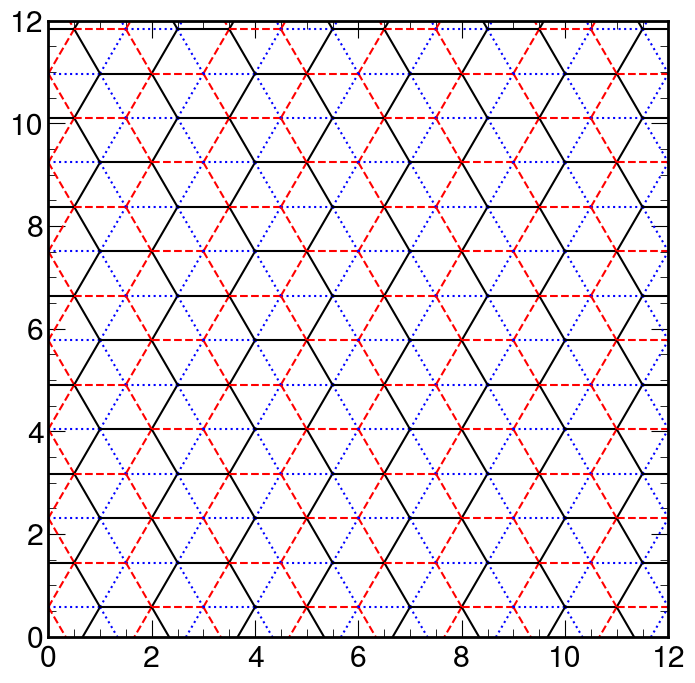

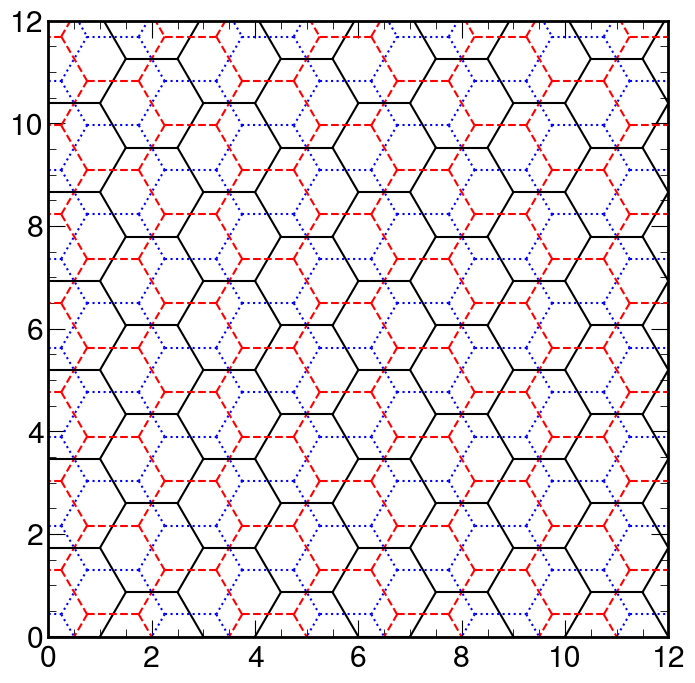

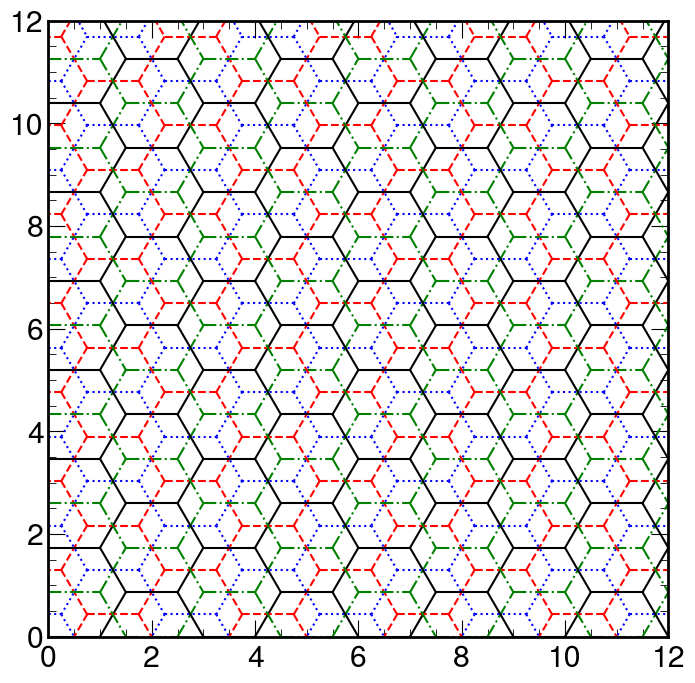

In [28]:
offsets={}
offsets["default"]=dict(x0s=(-1/2, 1/2, 0),y0s=(-np.sqrt(3)/6, -np.sqrt(3)/6, np.sqrt(3)/3))

offsets["alt1"] = dict(x0s=(0, 3/4, -3/4),y0s=(0, np.sqrt(3)/4,np.sqrt(3)/4))
offsets["alt2"] = dict(x0s=(0, 3/4, -3/4,0),y0s=(0, np.sqrt(3)/4,np.sqrt(3)/4, np.sqrt(3)/2))


for key in offsets:
    
    fig,axs=plt.subplots(figsize=(8,8))
    draw_hexagons(**offsets[key])
    plt.xlim(0,12)
    plt.ylim(0,12)
    plt.show()

[0.08856052 0.08986615 0.54392162 5.36019186 0.89866151 0.08986615]


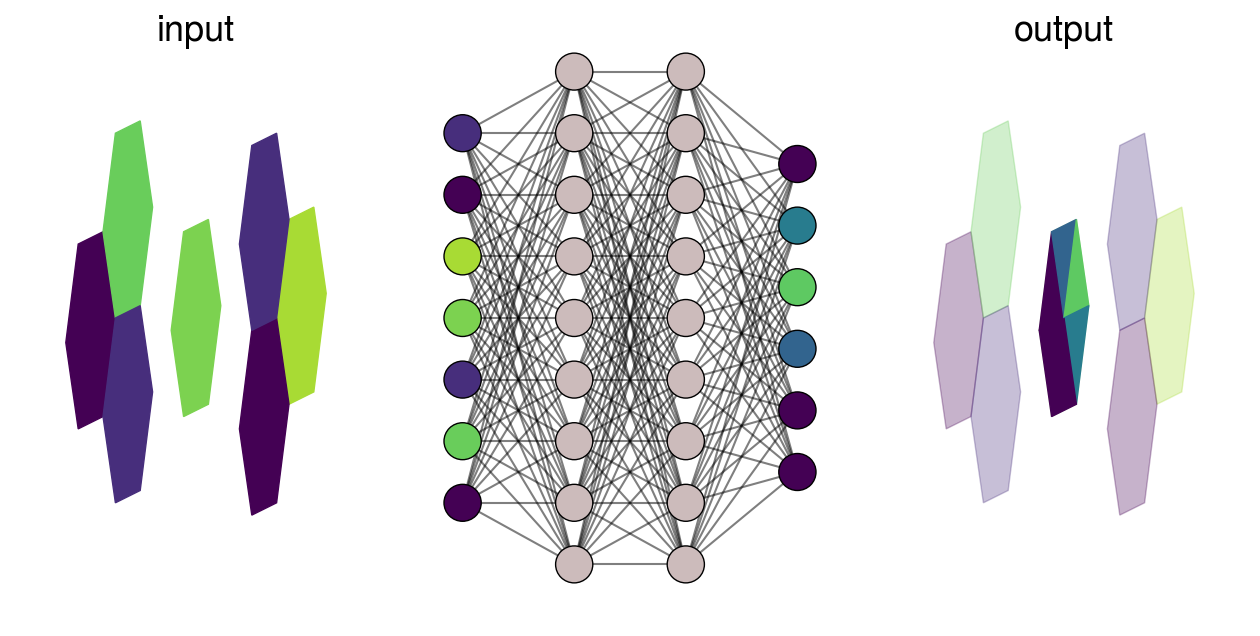

In [11]:
fig,ax=plt.subplots(figsize=(16,8))

#parameters for parallel projection
dx=0.4
dy=3/2
dy_x=0.4/2
dx_z=1.3


cmap = mpl.cm.get_cmap('viridis')

norm = mpl.colors.LogNorm(vmin=0.1, vmax=20.0)

#set values of inputs
vals=[0.1,6, 0.2, 7, 10, 0.1, 0.2]
vals_in=vals
colors=[[cmap(norm(v)) for v in vals]]
alpha=0.3
colors.append([list(rgba[0:3])+[rgba[3]*alpha] for rgba in colors[0]])
colors_in=colors[0]

#draw hexagons
dx_a=7
for j, cx0 in enumerate((-dx_a, dx_a)):
    for i,(cx, cy) in enumerate([(-dx, -dy_x),(dx/2, dy+dy_x/2), (dx/2, -dy+dy_x/2), 
                (dx_z, 0),
                    (2*dx_z+dx, dy_x),(2*dx_z-dx/2, -dy-dy_x/2), (2*dx_z-dx/2, dy-dy_x/2)]):
        cx+=cx0-dx_z

        points=zip((cx-dx/2, cx+dx/2, cx+dx, cx+dx/2, cx-dx/2, cx-dx), 
                    (cy-dy-dy_x/2, cy-dy+dy_x/2, cy+dy_x, cy+dy+dy_x/2, cy+dy-dy_x/2, cy-dy_x))

        p=mpl.patches.Polygon(list(points), color=colors[j][i])
        plt.gca().add_patch(p)

        
#now color the triangles
vals=np.hypot(np.array(vals),1)        
weights = np.array((vals[0]*vals[5], vals[0]*vals[6], vals[1]*vals[6], vals[1]*vals[4],
           vals[2]*vals[4], vals[2]*vals[5]))
weights/=sum(weights)

vals=weights*vals[3]
vals_out=vals
colors=[cmap(norm(v)) for v in vals]
colors_out=colors

points=((-dx+dx_a, -dy_x), (dx_a,0), (-dx/2+dx_a, -dy_x/2-dy))
p=mpl.patches.Polygon(list(points), color=colors[0])
plt.gca().add_patch(p)

points=((-dx+dx_a, -dy_x), (dx_a,0), (-dx/2+dx_a, -dy_x/2+dy))
p=mpl.patches.Polygon(list(points), color=colors[1])
plt.gca().add_patch(p)

points=((-dx/2+dx_a, dy-dy_x/2), (dx_a, 0), (dx/2+dx_a,dy+dy_x/2))
p=mpl.patches.Polygon(list(points), color=colors[2])
plt.gca().add_patch(p)

points=((dx+dx_a, dy_x), (dx_a,0), (dx/2+dx_a, dy_x/2+dy))
p=mpl.patches.Polygon(list(points), color=colors[3])
plt.gca().add_patch(p)

points=((dx+dx_a, dy_x), (dx_a,0), (dx/2+dx_a, dy_x/2-dy))
p=mpl.patches.Polygon(list(points), color=colors[4])
plt.gca().add_patch(p)

points=((-dx/2+dx_a, -dy-dy_x/2), (dx_a, 0), (dx/2+dx_a,-dy+dy_x/2))
p=mpl.patches.Polygon(list(points), color=colors[5])
plt.gca().add_patch(p)

#now draw a picture of a neural network
r=0.3
dx_c=2.7
dy_c=1
nmid=9
midcolor='#ccbbbb'
for i in range(7):
    c=mpl.patches.Circle((-dx_c,dy_c*(i-3)) ,r, facecolor=colors_in[i], edgecolor='k')
    plt.gca().add_patch(c)

for i in range(nmid):
    c=mpl.patches.Circle((-dx_c/3,dy_c*(i-nmid/2+1/2)) ,r, facecolor=midcolor,edgecolor='k')
    plt.gca().add_patch(c)
for i in range(nmid):
    c=mpl.patches.Circle((dx_c/3,dy_c*(i-nmid/2+1/2)) ,r, facecolor=midcolor,edgecolor='k')
    plt.gca().add_patch(c)
    
for i in range(6):
    c=mpl.patches.Circle((dx_c,dy_c*(i-2.5)) ,r, facecolor=colors_out[i], edgecolor='k')
    plt.gca().add_patch(c)
    
#now draw lines between nodes:
nodes_per_layer=7, nmid, nmid,6
for k in range(3):
    for i in range(nodes_per_layer[k]):
        for j in range(nodes_per_layer[k+1]):
            plt.plot((-dx_c+dx_c*2/3*k, -dx_c+dx_c*2/3*(k+1)),
                     (dy_c*(i-nodes_per_layer[k]/2+1/2), dy_c*(j-nodes_per_layer[k+1]/2+1/2)), 
                     zorder=-1, color='k', alpha=0.5)
            

#add some text:
plt.text(-dx_a, dy*3, "input",ha='center')
plt.text(dx_a, dy*3, "output",ha='center')

    
print(vals)
ax.set_xlim(-10, 10)
ax.set_ylim(-5, 5)
ax.axis("off")
plt.savefig("neural_network.png")
plt.show()

[0.13405876 0.11490751 0.12535365 1.14907508 5.74537541 0.7312296 ]


(-15.0, 5.0)

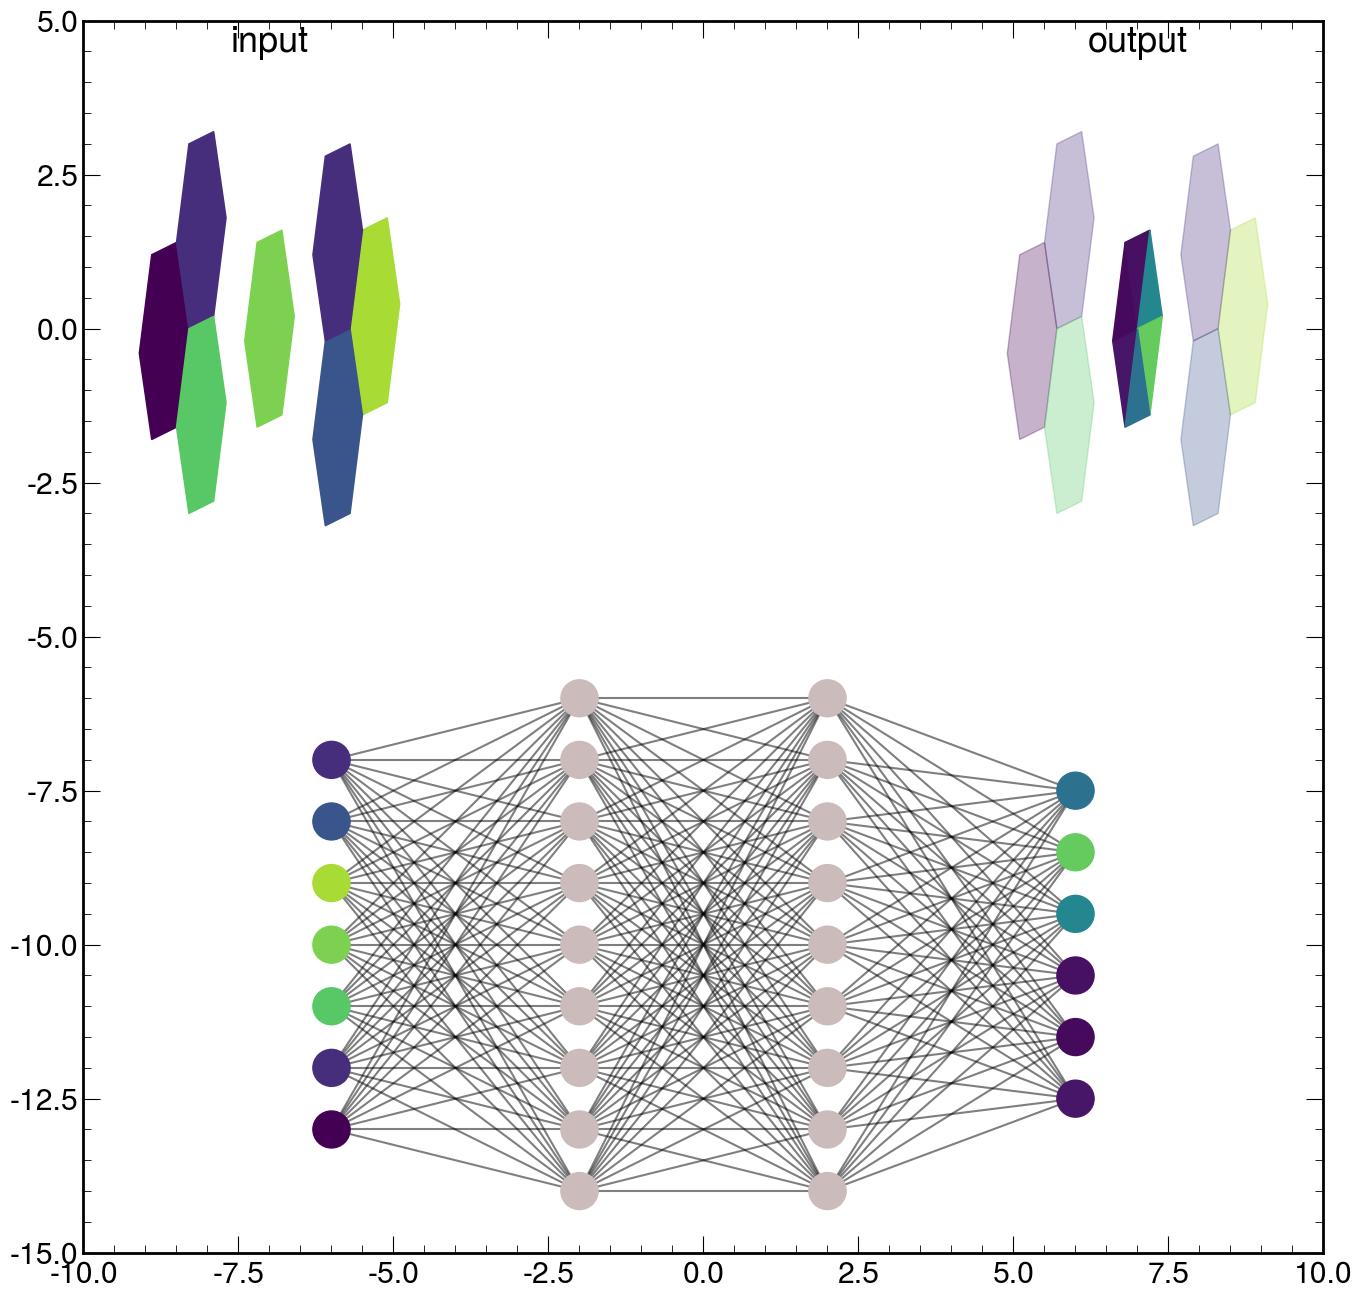

In [12]:
fig,ax=plt.subplots(figsize=(16,16))

#parameters for parallel projection
dx=0.4
dy=3/2
dy_x=0.4/2
dx_z=1.3


cmap = mpl.cm.get_cmap('viridis')

norm = mpl.colors.LogNorm(vmin=0.1, vmax=20.0)

#set values of inputs
vals=[0.1, 0.2,5, 7, 10, 0.4, 0.2]
vals_in=vals
colors=[[cmap(norm(v)) for v in vals]]
alpha=0.3
colors.append([list(rgba[0:3])+[rgba[3]*alpha] for rgba in colors[0]])
colors_in=colors[0]

#draw hexagons
dx_a=7
for j, cx0 in enumerate((-dx_a, dx_a)):
    for i,(cx, cy) in enumerate([(-dx, -dy_x),(dx/2, dy+dy_x/2), (dx/2, -dy+dy_x/2), 
                (dx_z, 0),
                    (2*dx_z+dx, dy_x),(2*dx_z-dx/2, -dy-dy_x/2), (2*dx_z-dx/2, dy-dy_x/2)]):
        cx+=cx0-dx_z

        points=zip((cx-dx/2, cx+dx/2, cx+dx, cx+dx/2, cx-dx/2, cx-dx), 
                    (cy-dy-dy_x/2, cy-dy+dy_x/2, cy+dy_x, cy+dy+dy_x/2, cy+dy-dy_x/2, cy-dy_x))

        p=mpl.patches.Polygon(list(points), color=colors[j][i])
        plt.gca().add_patch(p)

        
#now color the triangles
vals=np.array(vals)+1        
weights = np.array((vals[0]*vals[5], vals[0]*vals[6], vals[1]*vals[6], vals[1]*vals[4],
           vals[2]*vals[4], vals[2]*vals[5]))
weights/=sum(weights)

vals=weights*vals[3]
vals_out=vals
colors=[cmap(norm(v)) for v in vals]
colors_out=colors

points=((-dx+dx_a, -dy_x), (dx_a,0), (-dx/2+dx_a, -dy_x/2-dy))
p=mpl.patches.Polygon(list(points), color=colors[0])
plt.gca().add_patch(p)

points=((-dx+dx_a, -dy_x), (dx_a,0), (-dx/2+dx_a, -dy_x/2+dy))
p=mpl.patches.Polygon(list(points), color=colors[1])
plt.gca().add_patch(p)

points=((-dx/2+dx_a, dy-dy_x/2), (dx_a, 0), (dx/2+dx_a,dy+dy_x/2))
p=mpl.patches.Polygon(list(points), color=colors[2])
plt.gca().add_patch(p)

points=((dx+dx_a, dy_x), (dx_a,0), (dx/2+dx_a, dy_x/2+dy))
p=mpl.patches.Polygon(list(points), color=colors[3])
plt.gca().add_patch(p)

points=((dx+dx_a, dy_x), (dx_a,0), (dx/2+dx_a, dy_x/2-dy))
p=mpl.patches.Polygon(list(points), color=colors[4])
plt.gca().add_patch(p)

points=((-dx/2+dx_a, -dy-dy_x/2), (dx_a, 0), (dx/2+dx_a,-dy+dy_x/2))
p=mpl.patches.Polygon(list(points), color=colors[5])
plt.gca().add_patch(p)

#now draw a picture of a neural network
y_offset=-10
r=0.3
dx_c=6
dy_c=1
nmid=9
midcolor='#ccbbbb'
for i in range(7):
    c=mpl.patches.Circle((-dx_c,dy_c*(i-3)+y_offset) ,r, color=colors_in[i])
    plt.gca().add_patch(c)

for i in range(nmid):
    c=mpl.patches.Circle((-dx_c/3,dy_c*(i-nmid/2+1/2)+y_offset) ,r, color=midcolor)
    plt.gca().add_patch(c)
for i in range(nmid):
    c=mpl.patches.Circle((dx_c/3,dy_c*(i-nmid/2+1/2)+y_offset) ,r, color=midcolor)
    plt.gca().add_patch(c)
    
for i in range(6):
    c=mpl.patches.Circle((dx_c,dy_c*(i-2.5)+y_offset) ,r, color=colors_out[i])
    plt.gca().add_patch(c)
    
#now draw lines between nodes:
nodes_per_layer=7, nmid, nmid,6
for k in range(3):
    for i in range(nodes_per_layer[k]):
        for j in range(nodes_per_layer[k+1]):
            plt.plot((-dx_c+dx_c*2/3*k, -dx_c+dx_c*2/3*(k+1)),
                     (dy_c*(i-nodes_per_layer[k]/2+1/2)+y_offset, 
                      dy_c*(j-nodes_per_layer[k+1]/2+1/2)+y_offset), 
                     zorder=-1, color='k', alpha=0.5)
            

#add some text:
plt.text(-dx_a, dy*3, "input",ha='center')
plt.text(dx_a, dy*3, "output",ha='center')

    
print(vals)
ax.set_xlim(-10, 10)
ax.set_ylim(-15, 5)